In [18]:
import pandas as pd
import numpy as np

data = pd.read_csv('df_aragon.csv')
data.head()

,Fecha_emision,Fecha_expiracion,Emision_CO2,Clasificacion_Emisiones,ConsumoKWh/m2/Anio,Clasificacion_consumo,Tipo_edificio,Estado_edificio,Anio_construccion,Superficie_m2,Municipio,Provincia,Coordenadas_gps,Anio_emision,Dias_hasta_expiracion
0,2013-06-29,2023-06-29,30.11,E,142.33,E,Vivienda individual,Existente,1962,49.0,ZARAGOZA,ZARAGOZA,"674903,68 , 4612931,37",2013,3652
1,2013-09-26,2023-09-26,46.06,E,174.42,E,Vivienda individual,Existente,1974,81.0,ZARAGOZA,ZARAGOZA,"674062,96 , 4612970,24",2013,3652
2,2014-02-26,2024-02-26,20.30,D,94.16,D,Vivienda individual,Existente,1999,72.0,ZARAGOZA,ZARAGOZA,"671872,34 , 4612101,81",2014,3652
3,2013-06-12,2023-06-12,39.21,E,187.66,E,Vivienda individual,Existente,1970,65.0,ZARAGOZA,ZARAGOZA,"676128,95 , 4613401,52",2013,3652
4,2013-06-27,2023-06-27,103.75,G,409.03,G,Vivienda individual,Existente,1965,46.0,ZARAGOZA,ZARAGOZA,"674806,83 , 4613067,64",2013,3652


In [19]:
#Análisis inicial
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179852 entries, 0 to 179851
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Fecha_emision            179852 non-null  object 
 1   Fecha_expiracion         179852 non-null  object 
 2   Emision_CO2              179852 non-null  float64
 3   Clasificacion_Emisiones  179852 non-null  object 
 4   ConsumoKWh/m2/Anio       179852 non-null  float64
 5   Clasificacion_consumo    179852 non-null  object 
 6   Tipo_edificio            179852 non-null  object 
 7   Estado_edificio          179852 non-null  object 
 8   Anio_construccion        179852 non-null  int64  
 9   Superficie_m2            179852 non-null  float64
 10  Municipio                179852 non-null  object 
 11  Provincia                179852 non-null  object 
 12  Coordenadas_gps          179852 non-null  object 
 13  Anio_emision             179852 non-null  int64  
 14  Dias

In [20]:
data['Fecha_emision'] = pd.to_datetime(data['Fecha_emision'], errors='coerce')
data['Fecha_expiracion'] = pd.to_datetime(data['Fecha_expiracion'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179852 entries, 0 to 179851
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Fecha_emision            93324 non-null   datetime64[ns]
 1   Fecha_expiracion         179852 non-null  datetime64[ns]
 2   Emision_CO2              179852 non-null  float64       
 3   Clasificacion_Emisiones  179852 non-null  object        
 4   ConsumoKWh/m2/Anio       179852 non-null  float64       
 5   Clasificacion_consumo    179852 non-null  object        
 6   Tipo_edificio            179852 non-null  object        
 7   Estado_edificio          179852 non-null  object        
 8   Anio_construccion        179852 non-null  int64         
 9   Superficie_m2            179852 non-null  float64       
 10  Municipio                179852 non-null  object        
 11  Provincia                179852 non-null  object        
 12  Coordenadas_gps 

In [21]:
data.columns

Index(['Fecha_emision', 'Fecha_expiracion', 'Emision_CO2',
       'Clasificacion_Emisiones', 'ConsumoKWh/m2/Anio',
       'Clasificacion_consumo', 'Tipo_edificio', 'Estado_edificio',
       'Anio_construccion', 'Superficie_m2', 'Municipio', 'Provincia',
       'Coordenadas_gps', 'Anio_emision', 'Dias_hasta_expiracion'],
      dtype='object')

In [23]:
#Asumiendo Preprocesamiento de datos
#Quitar info "innecesaria"
quitar = ['Fecha_emision', 'Fecha_expiracion',
       'Municipio', 'Provincia', 'Coordenadas_gps',
       'Anio_emision', 'Dias_hasta_expiracion' ]
data.drop(columns=quitar, inplace=True)
print("Características a usar: ")
print(data.columns)

Características a usar: 
Index(['Emision_CO2', 'Clasificacion_Emisiones', 'ConsumoKWh/m2/Anio',
       'Clasificacion_consumo', 'Tipo_edificio', 'Estado_edificio',
       'Anio_construccion', 'Superficie_m2'],
      dtype='object')


In [24]:
#Eliminamos datos registros con datos faltantes
data.dropna(inplace=True) #No recomendado en problemas no demostrativos

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179852 entries, 0 to 179851
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Emision_CO2              179852 non-null  float64
 1   Clasificacion_Emisiones  179852 non-null  object 
 2   ConsumoKWh/m2/Anio       179852 non-null  float64
 3   Clasificacion_consumo    179852 non-null  object 
 4   Tipo_edificio            179852 non-null  object 
 5   Estado_edificio          179852 non-null  object 
 6   Anio_construccion        179852 non-null  int64  
 7   Superficie_m2            179852 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 11.0+ MB


In [26]:
#Cambio de variables
data = pd.get_dummies(data, drop_first=True)
data.head()

,Emision_CO2,ConsumoKWh/m2/Anio,Anio_construccion,Superficie_m2,Clasificacion_Emisiones_B,Clasificacion_Emisiones_C,Clasificacion_Emisiones_D,Clasificacion_Emisiones_E,Clasificacion_Emisiones_F,Clasificacion_Emisiones_G,...,Clasificacion_consumo_E,Clasificacion_consumo_F,Clasificacion_consumo_G,Tipo_edificio_Edificio completo,Tipo_edificio_Local,Tipo_edificio_Unifamiliar,Tipo_edificio_Vivienda individual,Estado_edificio_Obra Terminada,Estado_edificio_Proyecto Nueva Construcción,Estado_edificio_Proyecto Reforma
0,30.11,142.33,1962,49.0,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
1,46.06,174.42,1974,81.0,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
2,20.30,94.16,1999,72.0,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,39.21,187.66,1970,65.0,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
4,103.75,409.03,1965,46.0,False,False,False,False,False,True,...,False,False,True,False,False,False,True,False,False,False


In [30]:
#Escalar los valores
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columnas_escalado = ['Emision_CO2', 'ConsumoKWh/m2/Anio',
       'Anio_construccion', 'Superficie_m2']
data[columnas_escalado] = scaler.fit_transform(data[columnas_escalado])

In [32]:
#Modelo
#Dividir nuestro conjunto de entrenamiento y validación
from sklearn.model_selection import train_test_split

X = data.drop('Emision_CO2', axis=1)
y = data['Emision_CO2']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#modelos de regresión (Lineal, Lasso, Ridge y RFR)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
modelo = LinearRegression()
modelo.fit(xtrain, ytrain)
y_pred_lineal = modelo.predict(xtest)

modelo = Lasso(alpha=0.1)
modelo.fit(xtrain, ytrain)
y_pred_lasso = modelo.predict(xtest)

modelo = Ridge(alpha=0.1)
modelo.fit(xtrain, ytrain)
y_pred_ridge = modelo.predict(xtest)

modelo = RandomForestRegressor(n_estimators=50)
modelo.fit(xtrain, ytrain)
y_pred_rfr = modelo.predict(xtest)
#Evaluación con métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_lineal = mean_absolute_error(ytest, y_pred_lineal)
mse_lineal = mean_squared_error(ytest, y_pred_lineal)
r2_lineal = r2_score(ytest, y_pred_lineal)

mae_lasso = mean_absolute_error(ytest, y_pred_lasso)
mse_lasso = mean_squared_error(ytest, y_pred_lasso)
r2_lasso = r2_score(ytest, y_pred_lasso)

mae_ridge = mean_absolute_error(ytest, y_pred_ridge)
mse_ridge = mean_squared_error(ytest, y_pred_ridge)
r2_ridge = r2_score(ytest, y_pred_ridge)


mae_rfr = mean_absolute_error(ytest, y_pred_rfr)
mse_rfr = mean_squared_error(ytest, y_pred_rfr)
r2_rfr = r2_score(ytest, y_pred_rfr)

print(f"Lineal - MAE: {mae_lineal:.2f}, MSE: {mse_lineal:.2f}, R2: {r2_lineal:.2f}")
print(f"Lasso - MAE: {mae_lasso:.2f}, MSE: {mse_lasso:.2f}, R2: {r2_lasso:.2f}")
print(f"Ridge - MAE: {mae_ridge:.2f}, MSE: {mse_ridge:.2f}, R2: {r2_ridge:.2f}")
print(f"Random Forest Regressor - MAE: {mae_rfr:.2f}, MSE: {mse_rfr:.2f}, R2: {r2_rfr:.2f}")


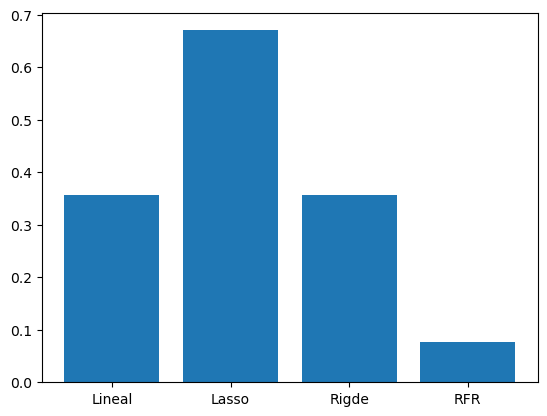

In [38]:
mse_resultados = [mse_lineal, mse_lasso, mse_ridge, mse_rfr]
mae_resultados = [mae_lineal, mae_lasso, mae_ridge, mae_rfr]

modelos = ["Lineal", 'Lasso', 'Rigde', 'RFR']

import matplotlib.pyplot as plt
plt.bar(modelos, mse_resultados)
plt.show()

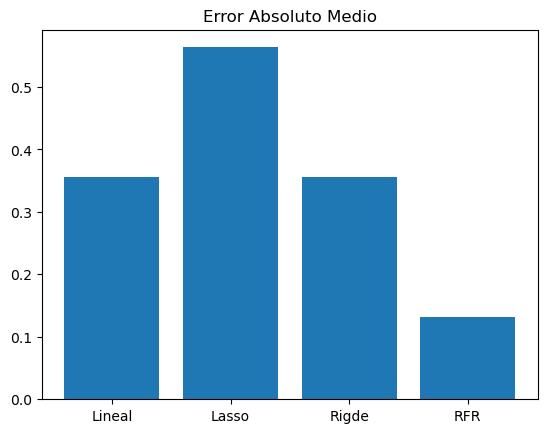

In [39]:
mae_resultados = [mae_lineal, mae_lasso, mae_ridge, mae_rfr]

modelos = ["Lineal", 'Lasso', 'Rigde', 'RFR']

import matplotlib.pyplot as plt
plt.bar(modelos, mae_resultados)
plt.title("Error Absoluto Medio")
plt.show()

## Solución mejor detallada + filtrado de valores atípicos

In [97]:
#Librerías  - Las he colocado arriba para mejorar la interpretación del código
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
#Cargamos el dataset
file_path = 'df_aragon.csv'
data = pd.read_csv(file_path)

In [98]:
#Análisis inicial
print("Data info:")
print(data.info())
print("Data describe: ")
print(data.describe())

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179852 entries, 0 to 179851
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Fecha_emision            179852 non-null  object 
 1   Fecha_expiracion         179852 non-null  object 
 2   Emision_CO2              179852 non-null  float64
 3   Clasificacion_Emisiones  179852 non-null  object 
 4   ConsumoKWh/m2/Anio       179852 non-null  float64
 5   Clasificacion_consumo    179852 non-null  object 
 6   Tipo_edificio            179852 non-null  object 
 7   Estado_edificio          179852 non-null  object 
 8   Anio_construccion        179852 non-null  int64  
 9   Superficie_m2            179852 non-null  float64
 10  Municipio                179852 non-null  object 
 11  Provincia                179852 non-null  object 
 12  Coordenadas_gps          179852 non-null  object 
 13  Anio_emision             179852 non-null  int64 

In [99]:
#Pequeño cambio en el nombre de las columnas para facilitar la escritura de código (Preferencia personal)
print(f"Nombres de las columnas originales: \n {data.columns}")
#Cambio a minúsculas 
data.columns = data.columns.str.lower()
print(f"Nombres de las columnas en minúsculas: \n {data.columns}")

Nombres de las columnas originales: 
 Index(['Fecha_emision', 'Fecha_expiracion', 'Emision_CO2',
       'Clasificacion_Emisiones', 'ConsumoKWh/m2/Anio',
       'Clasificacion_consumo', 'Tipo_edificio', 'Estado_edificio',
       'Anio_construccion', 'Superficie_m2', 'Municipio', 'Provincia',
       'Coordenadas_gps', 'Anio_emision', 'Dias_hasta_expiracion'],
      dtype='object')
Nombres de las columnas en minúsculas: 
 Index(['fecha_emision', 'fecha_expiracion', 'emision_co2',
       'clasificacion_emisiones', 'consumokwh/m2/anio',
       'clasificacion_consumo', 'tipo_edificio', 'estado_edificio',
       'anio_construccion', 'superficie_m2', 'municipio', 'provincia',
       'coordenadas_gps', 'anio_emision', 'dias_hasta_expiracion'],
      dtype='object')


In [100]:
#Preprocesamiento
#Mismo cambio de fechas a datatime que hicimos antes - Por si luego quieren probar con series temporales
data['fecha_emision'] = pd.to_datetime(data['fecha_emision'], errors='coerce')
data['fecha_expiracion'] = pd.to_datetime(data['fecha_expiracion'], errors='coerce')

# # Creación de características basadas en fechas
#diferencia en días entre la fecha de emisión y expiración puede ser relevante para predecir emisiones de CO2.
# data['Dias_diferencia'] = (data['Fecha_expiracion'] - data['Fecha_emision']).dt.days

"""
No olviden realizar un EDA apropiado

"""
#Quitamos info "innecesaria"
quitar = ['fecha_emision', 'fecha_expiracion', 'municipio', 'provincia',
          'coordenadas_gps','anio_emision']
data.drop(columns=quitar, inplace=True)
print("Características a usar: ")
print(data.columns)

#Eliminamos registros con valores faltantes
print(f"Número inicial de registros: {data.shape[0]}")
data.dropna(inplace=True)
print(f"Número registros luego de quitar valores faltantes: {data.shape[0]}")


Características a usar: 
Index(['emision_co2', 'clasificacion_emisiones', 'consumokwh/m2/anio',
       'clasificacion_consumo', 'tipo_edificio', 'estado_edificio',
       'anio_construccion', 'superficie_m2', 'dias_hasta_expiracion'],
      dtype='object')
Número inicial de registros: 179852
Número registros luego de quitar valores faltantes: 179852


In [101]:
#Manejo de valores atípicos en columnas numéricas (Parte estadística que ustedes ya conocen)
data_filt = data.copy()
#Filtro simple con 1.5^*rango_inter_cuantílico - Asumo distribución normal(comprobar) - eliminar directamente
for columna in ['emision_co2', 'consumokwh/m2/anio', 'superficie_m2', 'dias_hasta_expiracion']:
    Q1 = data_filt[columna].quantile(0.25)
    Q3 = data_filt[columna].quantile(0.75)
    rango_inter_quantil = Q3 - Q1 
    lim_inf = Q1 - 1.5 * rango_inter_quantil
    lim_sup = Q3 + 1.5 * rango_inter_quantil
    data_filt = data_filt[(data_filt[columna] >= lim_inf) & (data_filt[columna] <= lim_sup)]

print(f"Número registros luego del filtro de valores atípicos: {data_filt.shape[0]}")
print(f"Registros eliminados: {data.shape[0] - data_filt.shape[0]}, es decir, el {(((data.shape[0] - data_filt.shape[0])/data.shape[0])*100):.2f}% de los datos")
#Como es aproximadamente el 30%, se debería probar otra alternativa que ajuste valores sin borrar


Número registros luego del filtro de valores atípicos: 129813
Registros eliminados: 50039, es decir, el 27.82% de los datos


In [102]:
#Winsor
data_filt = data.copy()
#Filtro simple con rango_inter_cuantílico
for columna in ['emision_co2', 'consumokwh/m2/anio', 'superficie_m2', 'dias_hasta_expiracion']:
    Q1 = data_filt[columna].quantile(0.25)
    Q3 = data_filt[columna].quantile(0.75)
    rango_inter_quantil = Q3 - Q1 
    data_filt[columna] = data_filt[columna].clip(lower=Q1 - 1.5 * rango_inter_quantil, upper=Q3 + 1.5 * rango_inter_quantil)

print(f"Número registros luego del filtro de valores atípicos: {data_filt.shape[0]}")
print(f"Registros eliminados: {data.shape[0] - data_filt.shape[0]}, es decir, el {(((data.shape[0] - data_filt.shape[0])/data.shape[0])*100):.2f}% de los datos")
#Como es aproximadamente el 30%, se debería probar otra alternativa que ajuste valores sin borrar


Número registros luego del filtro de valores atípicos: 179852
Registros eliminados: 0, es decir, el 0.00% de los datos


In [103]:
#Codificado de variables categóricas
data_filt = pd.get_dummies(data_filt, drop_first=True)

#Escalado
scaler = StandardScaler()
scaled_columns = ['emision_co2', 'consumokwh/m2/anio', 'superficie_m2', 'anio_construccion', 'dias_hasta_expiracion']
data_filt[scaled_columns] = scaler.fit_transform(data_filt[scaled_columns])


In [104]:
#Modelo
# Conjunto de entrenamiento y prueba
X = data_filt.drop('emision_co2', axis=1)
y = data_filt['emision_co2']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

#Implementación de modelos
#Voy a crear una pipeline para optimizar lo que vamos probando. Si queremos añadir otros modelos, solo hay que declarar al modelo.
modelos = {
    "Lineal": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=0.1),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=50, random_state=42)
}
#Almacenamos los resultados
resultados = {"Modelo": [], "MAE": [], "MSE": [], "R2": []}

#Ahora, entrenamos cada modelo y guardamos resultados sobre los valores predichos
for nombre, modelo in modelos.items():
    modelo.fit(xtrain, ytrain)
    y_pred = modelo.predict(xtest)
    
    mae = mean_absolute_error(ytest, y_pred)
    mse = mean_squared_error(ytest, y_pred)
    r2 = r2_score(ytest, y_pred)
    
    #Tomen en cuenta que los resultados se están obteniendo con una sola prueba sobre los mismos datos. 
    #Se debería usar cross_validation para tener una mejor evaluación de los algoritmos.
    resultados["Modelo"].append(nombre)
    resultados["MAE"].append(mae)
    resultados["MSE"].append(mse)
    resultados["R2"].append(r2)

#Ver resultados en un dataframe 
resultados_df = pd.DataFrame(resultados)
resultados_df


,Modelo,MAE,MSE,R2
0,Lineal,0.190887,0.095478,0.904281
1,Lasso,0.259934,0.151409,0.848210
2,Ridge,0.190878,0.095478,0.904282
3,Random Forest Regressor,0.130710,0.056591,0.943267


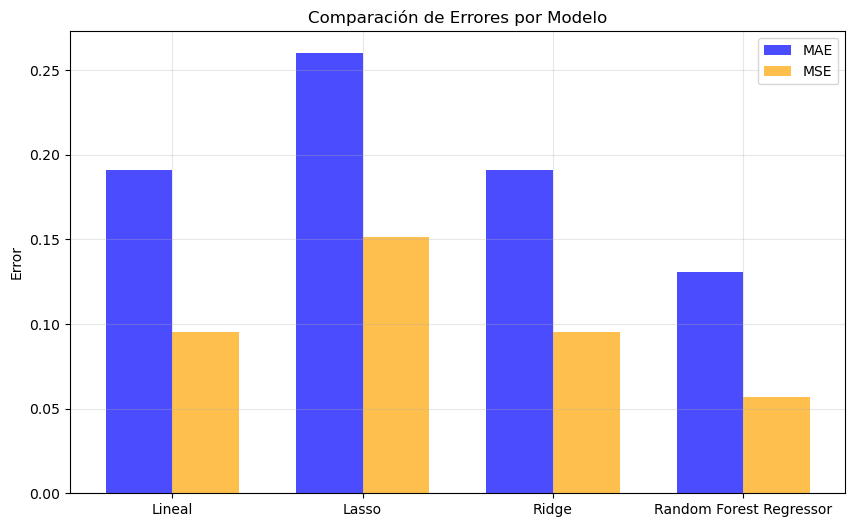

In [105]:
#Vamos a graficar las 2 métricas a la vez (MSE y MAE)
x = np.arange(len(modelos)) #Hay que ver cuántos modelos tenemos
width = 0.35  # Ancho de las barras porque hay que ajustar al gráfico

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, resultados_df['MAE'], width, label='MAE', alpha=0.7, color ='blue')
plt.bar(x + width/2, resultados_df['MSE'], width, label='MSE', alpha=0.7, color='orange')
plt.xticks(x, modelos)  #Agregamos el nombre de los modelos 
plt.ylabel("Error")
plt.title("Comparación de Errores por Modelo")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

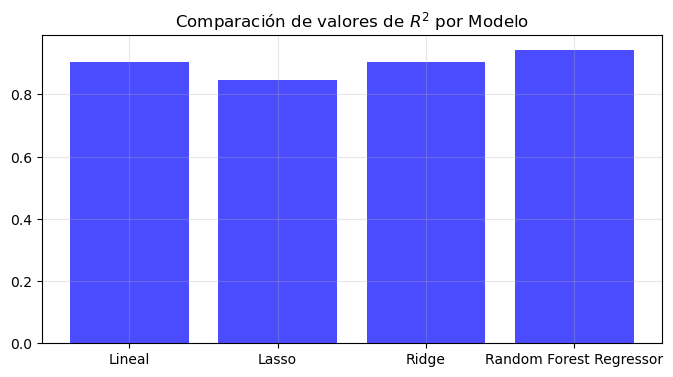

In [106]:
plt.figure(figsize=(8,4))
plt.bar(x, resultados_df['R2'].values, alpha = 0.7, color = 'blue')
plt.title("Comparación de valores de $R^2$ por Modelo")
plt.xticks(x, modelos)
plt.grid(alpha=0.3)
plt.show()

In [107]:
#Aquí debe ir su interpretación de los resultados.